# Trabajo Práctico 1 - Matrices de Insumo Producto

## Integrantes

* Martínez, Fausto
* Mendez Ayala, Lautaro Evaristo
* Oviedo, Santiago

## Enunciado

In [1]:
import numpy as np
import pandas as pd

### Consigna 1
Analizar qué sucede con la solución del sistema $(I-A)p = d$ en cada uno de los siguiente casos:

a) $(I-A)$ es inversible

b) $(I-A)$ es inversible y $d=0$

c) $(I-A)$ no es inversible

d) $(I-A)$ no es inversible y $d=0$

<h4>Solución: </h4>

(a) Si $(I-A)$ es inversible, existe una única solución al sistema y esta es $p = (I-A)^{-1} d$

(b) Si $(I-A)$ es inversible, y aparte $d=0$, no solo existe una única solución, si no que esta es $p = (I-A)^{-1} d = 0$

(c) Si $(I-A)$ no es inversible, tenemos dos casos:
* Si $d \notin \text{Im}(I-A)$:
  El sistema no tiene solución, pues en tal caso, por definición, no encontraremos ningún $p$ tal que $(I-A)p=d$
* Si $d \in \text{Im}(I-A)$:
  El sistema tiene infinitas soluciones, pues como $d \in \text{Im}(I-A)$, existe algún $p_0$ tal que $(I-A)p_0 = d$, y por tanto, como $(I-A)$ es singular (lo que implica que $\ker(I-A) \neq \{0\}$), tenemos que la solución del sistema es

  $S = \{p_0 + k : k \in \ker(I-A)\}$

  que es infinito pues $\ker(I-A)$ lo es.

(d) Si $(I-A)$ no es inversible, y aparte $d=0$, resulta que como las soluciones al sistema son lisa y llanamente $\ker(I-A)$, con $(I-A)$ singular, por lo que tiene infinitas soluciones. 

### Consigna 2

Implementar el cálculo de la inversa de la matriz $(I-A)$ aplicando LU. Para ello completar el código de la función $\texttt{calcularLU}$ que se encuentra en el archivo $\texttt{funciones.py}$ del template del TP. Esta función debe devolver las matrices $L$ y $U$. Luego, completar el código de la otra función $\texttt{inversaLU}(L,U)$, que devuelve la inversa final a través de las matrices $L$ y $U$ devueltas por la anterior función. Para resolver sistemas, únicamente podrá utilizarse la función $\texttt{scipy.linalg.solve\_triangular}$ de la biblioteca $\texttt{scipy.linalg}$ que resuelve sistemas triangulares.

In [2]:
import funciones as f

---

### Consigna 3

Resolver el sistema $(I-A) p = d$ utilizando $\texttt{inversaLU}$ para los siguientes valores de $A$ y de $d$:

$A =\begin{pmatrix}
0.3 & 0.0 & 0.1\\
0.05 & 1.0 & 0.2\\
0.1 & 0.15 & 0.1
\end{pmatrix}
$, $d = \begin{pmatrix}
100\\
100\\
300 
\end{pmatrix}$

respondiendo lo siguiente:
* ¿Hay una justificación económica de los valores encontrados para $p$?
* ¿Cuál es la característica de la matriz que lleva a esta solución?

In [3]:
A = np.asarray([[0.3,0,0.1],[0.05,1,0.2],[0.1,0.15,0.1]])
d = np.array([100,100,300])

In [4]:
B = np.eye(3) - A
L, U, P = f.calcularLU(B)

In [5]:
assert np.allclose(P@B,L@U)

Observemos que si teníamos el sistema

* $(I-A)p = d$

al permutar terminamos con 

* $P(I-A)p = Pd$

y entonces utilizando que $P(I-A)=LU$, tenemos

* $LUp = Pd$

y por consiguiente:

$\boxed{p=(LU)^{-1} P d}$

In [6]:
p = f.inversaLU(L,U) @ P @ d
print(p)

[   68.96551724 -5149.42528736  -517.24137931]


In [7]:
assert np.allclose(B@p,d)

In [8]:
# Aprovechamos y nos creamos una función para hacer este mismo procedimiento
def resolver_sistema_con_LU(A,b):
    L, U, P = f.calcularLU(A)
    x = f.inversaLU(L,U) @ P @ b
    return x

Entonces llegamos a que $p \approx \begin{pmatrix}
68.97\\
-5149.43\\
-517.24 
\end{pmatrix}$

La matriz $A$ nos dice que lo que necesitamos para producir una unidad del producto 2, es una unidad entera del producto 2, sumada a una proporción del producto 1 y del producto 3, lo cual consideramos que es bastante inconsistente, y es lo que creemos que justifica el valor tan negativo que nos da $p$ en su segunda coordenada.

---

### Consigna 4

Analizar analíticamente qué sucede con la producción total cuando a partir de una demanda externa $d$, la demanda externa para el producto 3 cambia en un $\Delta d$. La demanda externa se convierte en

$d' = d + \begin{pmatrix}0 \\ 0 \\ 1\end{pmatrix}$

Obtener la expresión del vector $\Delta p$ correspondiente a este ejemplo.

Al cambiar la demanda poniendo un shock $\Delta d$, habra un cambio en la producción dado por $\Delta p$. Esto se puede expresar matemáticamente como:

$(I-A)(p + \Delta p) = d + \Delta d$

$(I-A)p + (I-A)\Delta p = d + \Delta d$

Ahora, usando que ya sabemos que $(I-A)p = d$, podemos simplificar estas expresiones de ambos lados y resulta:

$(I-A)\Delta p = \Delta d$, con lo cual, si $(I-A)$ es inversible,

$\Delta p = (I-A)^{-1}\Delta d$

Llamando a la matriz de Leontief $L = (I-A)^{-1}$ y usando la expresion del $\Delta d$ para este ejemplo, resulta:

$\boxed{\Delta p = L \begin{pmatrix}0 \\ 0 \\ 1\end{pmatrix}}$

<h3>Coeficientes técnicos</h3>

Las matrices $A$ con las que estuvimos trabajando tienen la característica de que son coeficientes técnicos que muestran la relación del flujo de los insumos y los productos. En la práctica, los valores de producción, insumos, y los flujos relacionados, compras y ventas pensados en un período de tiempo (por ejemplo, un año), están dados en unidades monetarias. Por ejemplo, un Sector 4 que produce un total de producto equivalente a $\$ 15.000$, emplea $\$300$ de bienes del Sector 1: $z_{14} =300$ y $p_4 = 15.000$. En este caso, $a_{14}=\frac{z_{14}}{p_4} = \frac{300}{15.000} = 0.02$. Estos coeficientes técnicos se consideran fijos en el sentido de ser una medida de interrelación entre las salidas del sector y las entradas.

De forma matricial, teniendo $n$ sectores, podemos definir $P=\begin{pmatrix} p_1 & \cdots & 0 \\ \vdots & \ddots & \vdots \\ 0 & \cdots & p_n\end{pmatrix}$.

Luego, la matriz $A=ZP^{-1}$.

---

### Consigna 5

Encontrar los coeficientes técnicos $A$ y la matriz de Leontief para la siguiente economía:

|  | Sector 1 | Sector 2 | Sector 3 | Total producido|
|-------------|------|------|-----|------:|
| Sector 1    | 350  | 0    | 0   | 1000 |
| Sector 2    | 50   | 250  | 150 | 500  |
| Sector 3    | 200  | 150  | 550 | 1000 |

In [9]:
Z = [[350,0,0],[50,250,150],[200,150,550]]
P = np.diag([1000,500,1000])

In [10]:
A = Z @ np.linalg.inv(P)

In [11]:
print(A)

[[0.35 0.   0.  ]
 [0.05 0.5  0.15]
 [0.2  0.3  0.55]]


In [12]:
Leontief = np.linalg.inv(np.eye(3) - A)
print(Leontief)

[[1.53846154 0.         0.        ]
 [0.44871795 2.5        0.83333333]
 [0.98290598 1.66666667 2.77777778]]


La matriz de coeficientes técnicos es $A = \begin{pmatrix}
0.35 & 0.0 & 0.0\\
0.05 & 0.5 & 0.15\\
0.2 & 0.3 & 0.55
\end{pmatrix}$, y la de Leontief es $L\approx \begin{pmatrix}
1.54 & 0.00 & 0.00\\
0.45 & 2.5 & 0.83\\
0.98 & 1.67 & 2.78
\end{pmatrix}$ 

---

<h3>Matrices regionales</h3>

Si bien el modelo de Leontief trabaja a nivel nacional, la particularidad de disgregar las economías en regiones permite estudiar las distintas particularidades de una economía en su conjunto.

Desde un punto de vista formal, el cambio al análisis regional consiste en identificar aquellas matrices de intercambio de flujos de capital entre sectores que establecen relaciones inter-regional e intra-regional.

En las variables que trabajamos se utiliza un superíndice indicando la región a la que refiere la variable. Por ejemplo el flujo monetario $z_{ij}^{rr}$ denota los montos del sector $i$ de la región $r$ hacia el sector $j$ en la región $r$. De la misma manera, se puede derivar el siguiente coeficiente técnico:

$a_{ij}^{rr} = \frac{z_{ij}^{rr}}{p_j^r}$ (eq. 3)

y sea $Z^{rr} \in \mathbb{R}^{n\times n}$ y $P^r \in \mathbb{R}^{n\times n}$ matriz diagonal que puede entonces calcular:

$A^{rr} = Z^{rr}(P^r)^{-1}$

El cálculo del total producto en la región $r$ se obtiene nuevamente por la matriz de Leontief:

$p^r = (I-A^rr)^{-1} d^r$

Cuando integramos una segunda región $s$ en la economía, la matriz de flujo de capitales $Z$ total se puede escribir como

$Z = \begin{pmatrix}Z^{rr} & Z^{rs} \\ Z^{sr} & Z^{ss} \end{pmatrix}$

donde tanto $Z^{rr}$ y $Z^{ss}$ son matrices cuadradas, pero $Z^{rs}$ y $Z^{sr}$ no lo precisan.

Cuando calculamos los coeficientes técnicos de las matrices interregionales, ya $a^{rr}$ estaba calculado en eq. 3, obtenemos:

$a_{ij}^{ss} = \frac{z_{ij}^{ss}}{p_j^s}$

$a_{ij}^{rs} = \frac{z_{ij}^{rs}}{p_j^s}$

$a_{ij}^{sr} = \frac{z_{ij}^{sr}}{p_j^r}$

Volviendo a la ecuación del principio, podemos reescribir el modelo de Leontief para dos regiones:

$\left(\begin{pmatrix}I_{n\times n} & 0_{n\times m} \\ 0_{m\times n} & I_{m\times m} \end{pmatrix} - \begin{pmatrix}A^{rr} & A^{rs} \\ A^{sr} & A^{ss} \end{pmatrix}\right) \begin{pmatrix} p^r \\ p^s \end{pmatrix} = \begin{pmatrix} d^r \\ d^s \end{pmatrix}$ (eq. 4)

donde suponemos que $A^{rr} \in \mathbb{R}^{n \times n}$, $A^{ss} \in \mathbb{R}^{m \times m}$, $A^{sr} \in \mathbb{R}^{m \times n}$, $A^{rs} \in \mathbb{R}^{n \times m}$. En la práctica se busca establecer la producción adicional necesaria de los sectores para cubrir una variación en la demanda $d$. Supongamos que estamos interesados en establecer sobre la región $r$ la variación $\Delta p^r$ de producción, dada por un $\Delta d^r$, como vimos en la Consigna 4, tenemos el modelo de región simple como

$\Delta p^r = (I-A^{rr})^{-1} \Delta d^r$ (eq. 5)

---

### Consigna 6
A partir de la fórmula 4, deducir cómo se calcula la variación de la producción en la región $r$ para cubrir una variación de la demanda considerando las relaciones interregionales. Fijando por simplicidad $\Delta d^s = 0$, deducir la siguiente fórmula:

$\Delta p^r = (I-A^{rr}-A^{rs}(I-A^{ss})^{-1}A^{sr})^{-1} \Delta d^r$ (eq. 6)

Dado el sistema

$\begin{pmatrix}I_{n\times n}- A^{rr} & -A^{rs} \\ -A^{sr} & I_{m\times m}-A^{ss} \end{pmatrix} \begin{pmatrix} p^r \\ p^s \end{pmatrix} = \begin{pmatrix} d^r \\ d^s \end{pmatrix}$

Y una variación de la demanda dada por $\begin{pmatrix} \Delta d^r \\ 0 \end{pmatrix}$, tenemos que la variación de la producción estará dada por $\begin{pmatrix} \Delta p^r \\ \Delta p^s \end{pmatrix}$, luego:

$\begin{pmatrix}I_{n\times n}- A^{rr} & -A^{rs} \\ -A^{sr} & I_{m\times m}-A^{ss} \end{pmatrix} \left( \begin{pmatrix} p^r \\ p^s \end{pmatrix} + \begin{pmatrix} \Delta p^r \\ \Delta p^s \end{pmatrix}  \right) = \begin{pmatrix} d^r \\ d^s \end{pmatrix} + \begin{pmatrix} \Delta d^r \\ 0 \end{pmatrix}\,. $

De la misma manera que en el ejercicio 4, como vale que $\begin{pmatrix}I_{n\times n}- A^{rr} & -A^{rs} \\ -A^{sr} & I_{m\times m}-A^{ss} \end{pmatrix} \begin{pmatrix} p^r \\ p^s \end{pmatrix} = \begin{pmatrix} d^r \\ d^s \end{pmatrix}$, podemos simplificar esos términos, y tenemos que

$\begin{pmatrix}I_{n\times n}- A^{rr} & -A^{rs} \\ -A^{sr} & I_{m\times m}-A^{ss} \end{pmatrix} \begin{pmatrix} \Delta p^r \\ \Delta p^s \end{pmatrix} = \begin{pmatrix} \Delta d^r \\ 0 \end{pmatrix}$

Efectuando la multiplicación de matrices en bloque, podemos deducir las siguiente ecuaciones:


$\begin{align} 
(I_{n\times n}- A^{rr}) \Delta p^r - A^{rs}\Delta p^s = \Delta d^r\\ 
-A^{sr} \Delta p^r + (I_{m\times m}-A^{ss}) \Delta p^s = 0\,.
\end{align}$

De la segunda ecuación, vemos que, si $(I_{m\times m}-A^{ss})$ es inversible, $\Delta p^s = (I_{m\times m}-A^{ss})^{-1}A^{sr} \Delta p^r$. Reemplazando esto en la primera ecuación, obtenemos

$(I_{n\times n}- A^{rr}) \Delta p^r - A^{rs}(I_{m\times m}-A^{ss})^{-1}A^{sr} \Delta p^r = \Delta d^r$

$(I_{n\times n}- A^{rr} - A^{rs}(I_{m\times m}-A^{ss})^{-1}A^{sr}) \Delta p^r = \Delta d^r\,,$

de donde, si $(I_{n\times n}- A^{rr} - A^{rs}(I_{m\times m}-A^{ss})^{-1}A^{sr})$ es inversible, resulta:

$\boxed{\Delta p^r = (I_{n\times n}- A^{rr} - A^{rs}(I_{m\times m}-A^{ss})^{-1}A^{sr})^{-1}\Delta d^r}\,.$


---

### Consigna 7

Esta última consigna del Trabajo Práctico busca aplicar todo lo visto anteriormente a un caso real. Para ello utilizaremos las Matrices de Insumo-Producto generadas por la Comisión Económica para América Latina y el Caribe (CEPAL), un organismo de las Naciones Unidas.

* Descargar de [este link](https://www.cepal.org/es/eventos/matrices-insumo-producto-como-herramienta-politicas-comerciales-industriales-america-latina), en la sección Adjuntos, la MIP Latinoamericana 2011 (Preliminar). Este es un archivo de Excel, el cual deben leer con la librería pandas de Python. En la hoja 'LAT_IOT_2011' se encontrarán los flujos entre 40 sectores de 18 países, expresados en millones de dólares. La última columna del archivo, con el título 'Output' es el total producido para ese sector.
* Seleccionar los dos países P1 y P2 que les fue asignado al grupo y generar la matriz de Insumo-Producto de estas dos regiones.
* Calcular los coeficientes técnicos para cada bloque en sus submatrices intra-regionales e inter-regionales de la $A$ total.
* Simular un shock negativo sobre el sector $\texttt{s05}$ del $10\%$ del total del sector, y un shock positivo del $3.3\%$ del total de cada uno de los siguientes sectores: $\texttt{s06}$, $\texttt{s07}$ y $\texttt{s08}$. Todos esos shocks se producen en el país P1
* Analizar cómo se modifica la producción cuando se considera el modelo de región simple (eq. 5) y cuando se considera la fórmula completa de las 2 regiones (eq. 6)

Los dos paises que nos fueron asignados son $P_1 = \text{Brasil}$, $P_2 = \text{Bolivia}$

In [13]:
# Obtenemos la informacion del Excel de la CEPAL
data = pd.read_excel("./datos.xlsx",sheet_name="LAC_IOT_2011")

In [14]:
# Vemos la pinta que tiene el DataFrame
data.head()

,Country_iso3,Nosector,Sector,ARGs1,ARGs2,ARGs3,ARGs4,ARGs5,ARGs6,ARGs7,...,EXP_MDV,EXP_NPL,EXP_TUR,EXP_PAK,EXP_LKA,EXP_CUB,EXP_SUR,EXP_ROW,Adjustment,Output
0,ARG,s01,Agriculture and forestry,9725.566485,18.369597,0.000000,0.000000,11890.682268,2331.532300,594.552280,...,0.000000,0.865281,132.020508,2.572569,0.0,30.970039,0.011896,2403.097412,-1695.114624,64585.080680
1,ARG,s02,Hunting and fishing,13.820241,0.062689,0.000000,0.000000,1.253285,2.774203,0.445318,...,0.000000,0.000000,0.161072,0.000000,0.0,0.000000,0.000000,0.815166,5.434752,1430.287291
2,ARG,s03,Mining and quarrying (energy),6.095956,0.140437,2238.394196,47.503210,0.522333,0.618710,0.165520,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1847.147827,23964.065765
3,ARG,s04,Mining and quarrying (non-energy),0.000000,0.687199,295.194361,470.706336,1.140358,13.123509,1.914597,...,0.000000,0.000000,0.000000,0.000000,0.0,0.019760,0.000000,0.432800,355.133514,7486.322979
4,ARG,s05,Meat and meat products; dairy products,23.017536,0.009325,0.505593,0.040398,356.730934,88.047795,15.017792,...,0.035902,0.000000,0.131605,0.547536,0.0,3.120524,0.039276,414.973785,-30.369465,17628.831707


In [15]:
# Nos quedamos con las filas correspondientes a Brasil y Bolivia
data_BRA_BOL = data[data["Country_iso3"].isin(["BRA","BOL"])]

# Nos quedamos con las columnas correspondientes a Brasil y Bolivia, más la columna Output
data_BRA_BOL = data_BRA_BOL[[col for col in data_BRA_BOL.columns if col.startswith("BRA") or col.startswith("BOL") or col=="Output"]]

# Reseteamos los indices de la tabla por comodidad
data_BRA_BOL = data_BRA_BOL.reset_index().drop(columns="index")

In [16]:
# Mostramos el resultado para convencernos de que hicimos bien la matriz
data_BRA_BOL

,BRAs1,BRAs2,BRAs3,BRAs4,BRAs5,BRAs6,BRAs7,BRAs8,BRAs9,BRAs10,...,BOLs32,BOLs33,BOLs34,BOLs35,BOLs36,BOLs37,BOLs38,BOLs39,BOLs40,Output
0,8759.594677,183.802943,12.237987,14.005361,29373.005548,9446.762361,15538.555687,23421.869850,1013.335027,2589.431793,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.117022,189993.204510
1,183.802943,3.856745,0.256790,0.293875,616.335010,198.221812,326.046167,491.462079,21.262851,54.334156,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000020,3986.635395
2,28.515684,0.598346,4234.896096,97.541854,4.406442,149.753630,3.314964,25.225517,38.806077,0.140032,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94890.601838
3,322.237628,6.761526,226.599170,1072.567732,35.324905,124.788515,10.128543,23.269877,7.144141,0.421785,...,0.0,0.350359,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,61580.195672
4,745.918167,15.651632,2.192449,1.237900,3554.205906,309.467144,0.527286,337.183320,13.018326,0.280040,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.177795,71270.085977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.002435,0.000051,0.052603,0.029016,0.007812,0.002181,0.008776,0.004920,0.000457,0.000203,...,0.0,0.226415,5.717055,24.469381,54.400170,3.149211,14.357549,17.489919,732.893768,3295.731583
76,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.133575,1.609350,2.451337,12.060684,5.036867,34.156201,18.310726,40.545263,479.652424
77,1.984713,0.041645,3.211846,1.888511,1.337121,0.978717,1.006287,1.268197,0.785731,0.234341,...,0.0,0.291215,2.174422,14.263532,16.503260,0.588479,14.080296,14.868621,79.471619,470.507738
78,4.700545,0.098632,76.715836,19.494883,3.024333,6.758605,5.012158,5.196742,4.415811,1.064906,...,0.0,0.383332,5.243341,35.970101,13.572310,102.231517,74.243996,0.317441,277.632044,687.605223


In [17]:
# Definimos la matriz Z como todas las columnas menos la ultima
Z = data_BRA_BOL.drop(columns="Output")

# Y a la matriz P como la columna "Output" de data_BRA_BOL
P = data_BRA_BOL["Output"]

In [18]:
# Nos preguntamos si alguno de los output es 0
(P==0).any()

True

Como observamos que hay valores en la columna $\texttt{Output}$ (la cual invertiremos) hay valores con ceros, tenemos que tomar alguna decisión sobre ellos, ya que no podemos dividir por cero. Una vez observado que estos valores corresponden a sectores de paises tales que toda sus columnas y filas están repletas de cero, sospechamos que se debe a que son sectores en los cuales los países no producen absolutamente nada (un ejemplo sería Bolivia en el sector 31: `Aircraft and spacecraft`). Por tanto, decidimos cambiar estos valores por $1$, ya que, por la observación anterior, no afecta a la multiplicación.

In [19]:
# Buscamos los indices donde la serie P es igual a 0
zeros_id = [id for id in P.index if P.loc[id] == 0] 

# Los modificamos por 1
P.loc[zeros_id] = 1

In [20]:
# Calculamos la matriz de coeficientes técnicos
A = Z @ np.linalg.inv(np.diag(P))

In [21]:
# Chequeamos que sea cuadrada
assert A.shape[0] == A.shape[1]

# Observamos que pinta tiene
display(A.head())

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,0.046105,0.046105,0.000129,0.000227,0.412137,0.153720,0.469486,0.354310,0.030031,0.333696,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.144260e-05
1,0.000967,0.000967,0.000003,0.000005,0.008648,0.003226,0.009851,0.007435,0.000630,0.007002,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.967066e-09
2,0.000150,0.000150,0.044629,0.001584,0.000062,0.002437,0.000100,0.000382,0.001150,0.000018,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00
3,0.001696,0.001696,0.002388,0.017417,0.000496,0.002031,0.000306,0.000352,0.000212,0.000054,...,0.0,0.0,0.003913,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00
4,0.003926,0.003926,0.000023,0.000020,0.049870,0.005036,0.000016,0.005101,0.000386,0.000036,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.738507e-05


Ahora, simulamos un shock negativo sobre el sector $\texttt{s05}$ del $10\%$ del total del sector, y un shock positivo del $3.3\%$ del total de cada uno de los siguientes sectores: $\texttt{s06}$, $\texttt{s07}$ y $\texttt{s08}$. Todos esos shocks se producen en Brasil

In [22]:
# Definimos la inversa de la matriz de Leontief
L_inv = np.eye(A.shape[0]) - A

# Calculamos la demanda usando d = (I-A) p = L^-1 p
d = L_inv @ P

In [23]:
# Para crear d', copiamos d y multiplicamos los valores correspondientes para simular los shocks
d_prime = d.copy()

# Simulamos el shock negativo del 10% en el sector 5
d_prime[4] *= 0.9

# Simulamos el shock positivo del 3.3% en los sectores 6, 7 y 8
d_prime[[5,6,7]] *= 1.033

Ahora, analicemos cómo se modifica la producción cuando se considera el modelo de región simple (eq. 5) y cuando se considera la fórmula completa de las 2 regiones (eq. 6)

In [24]:
def obtener_submatriz_regional(pais1,pais2):
    """ Obtiene la submatriz regional A_pais1_pais2 usando la formula A^{rs} = Z^{rs} (P^{s})^{-1}"""
    """ Precondicion: Nos pasan pais1 y pais2 como corresponden, o sea, usando el formato de 3 letras mayusculas"""

    # Obtenemos la matriz Z_pais1_pais2 quedandonos con las filas y columnas que corresponden
    Z_pais1_pais2 = data[data["Country_iso3"]==pais1][[col for col in data.columns if col.startswith(pais2)]]

    # Obtenemos la matriz P_pais2 quedandonos con la ultima columna de las filas correspondientes a pais2
    P_pais2 = data[data["Country_iso3"]==pais2]["Output"].copy()

    # Resolvemos el error de los ceros de la misma manera que antes:
    # Buscamos los indices donde la serie P es igual a 0
    zeros_id = [id for id in P_pais2.index if P_pais2.loc[id] == 0] 
    
    # Los modificamos por 1
    P_pais2.loc[zeros_id] = 1

    # Calculamos la matriz A usando la formula mencionada
    A_pais1_pais2 = Z_pais1_pais2 @ np.linalg.inv(np.diag(P_pais2))

    # Reseteamos los indices por comodidad
    A_pais1_pais2 = A_pais1_pais2.reset_index().drop(columns="index")

    return A_pais1_pais2

In [25]:
# Obtenemos las 4 submatrices regionales usando la funcion previamente definida
A_BRA_BRA = obtener_submatriz_regional("BRA","BRA")
A_BRA_BOL = obtener_submatriz_regional("BRA","BOL")
A_BOL_BRA = obtener_submatriz_regional("BOL","BRA")
A_BOL_BOL = obtener_submatriz_regional("BOL","BOL")

Recordemos el modelo de región simple:

$∆p^r = (I − A^{rr})^{−1}∆d^r $

* Simular un shock negativo sobre el sector $\texttt{s05}$ del $10\%$ del total del sector, y un shock positivo del $3.3\%$ del total de cada uno de los siguientes sectores: $\texttt{s06}$, $\texttt{s07}$ y $\texttt{s08}$. Todos esos shocks se producen en el país P1
* Analizar cómo se modifica la producción cuando se considera el modelo de región simple (eq. 5) y cuando se considera la fórmula completa de las 2 regiones (eq. 6)

In [26]:
# Calculamos d' para el pais P1
d_prime_BRA = d_prime.iloc[:40]

# Esto es d para el pais P1
d_BRA = d.iloc[:40]

# Esto es Delta d para el pais P1 (Delta d ^r en la formula)
delta_d_BRA = d_prime_BRA - d_BRA

In [27]:
# Definimos la matriz de Leontief para el modelo de region simple
L_BRA_BRA = np.linalg.inv(np.eye(A_BRA_BRA.shape[0]) - A_BRA_BRA)

# Obtenemos el cambio en la producción para el modelo de región simple
delta_p_BRA_simple = L_BRA_BRA @ delta_d_BRA

Ahora, recordando el modelo con la fórmula completa de las 2 regiones:

$\Delta p^r = (I_{n \times n}-A^{rr}-A^{rs}(I_{m \times m}-A^{ss})^{-1}A^{sr})^{-1} \Delta d^r$

In [28]:
delta_p_BRA_completa = np.linalg.inv(np.eye(40) - A_BRA_BRA - A_BRA_BOL@np.linalg.inv(np.eye(40)-A_BOL_BOL) @ A_BOL_BRA) @ delta_d_BRA

In [29]:
delta_p_BRA_simple

array([-1.60604672e+03, -3.36997458e+01, -4.83442581e+01, -5.99414744e+00,
       -6.06499588e+03,  1.36230968e+03,  6.80306981e+02,  1.27992121e+03,
        1.37232422e-02, -6.19662153e-03, -4.60503019e-01, -1.42546917e+00,
       -8.11381716e-01, -7.93677228e-02, -7.97788658e+00, -1.32281733e+02,
       -1.35061914e+02, -5.55781923e+01, -1.32380572e+01, -2.96338039e+00,
       -6.53624598e+00, -7.00812879e+00,  3.59436888e+00, -2.58447714e+01,
       -2.97410622e+00, -5.21110538e-01, -4.15610113e+00, -8.58735634e-01,
       -1.80984277e-01, -6.30257254e+00, -1.78635246e-01, -4.63408769e-01,
       -1.90653802e+00, -7.72025733e+01, -6.34986907e+00, -1.45925272e+02,
       -5.61057203e+00, -1.14869470e+02, -3.72637889e+01, -3.58510273e+02])

In [30]:
delta_p_BRA_completa

array([-1.60604722e+03, -3.36997577e+01, -4.83573054e+01, -5.99533133e+00,
       -6.06499592e+03,  1.36230963e+03,  6.80306516e+02,  1.27992113e+03,
        1.36793030e-02, -6.19709305e-03, -4.60873630e-01, -1.42555359e+00,
       -8.11455795e-01, -7.95521553e-02, -7.97912981e+00, -1.32316883e+02,
       -1.35062947e+02, -5.55787468e+01, -1.32387475e+01, -2.96551856e+00,
       -6.53647159e+00, -7.01624557e+00,  3.59402354e+00, -2.58461495e+01,
       -2.97689103e+00, -5.21147945e-01, -4.15667508e+00, -8.58979786e-01,
       -1.81075982e-01, -6.30354372e+00, -1.78653856e-01, -4.63689545e-01,
       -1.90763451e+00, -7.72034149e+01, -6.35021546e+00, -1.45929832e+02,
       -5.61130883e+00, -1.14871024e+02, -3.72677991e+01, -3.58514653e+02])

In [31]:
import matplotlib.pyplot as plt

Text(0.5, 0.98, 'Variación de la producción según el sector')

<Figure size 600x600 with 0 Axes>

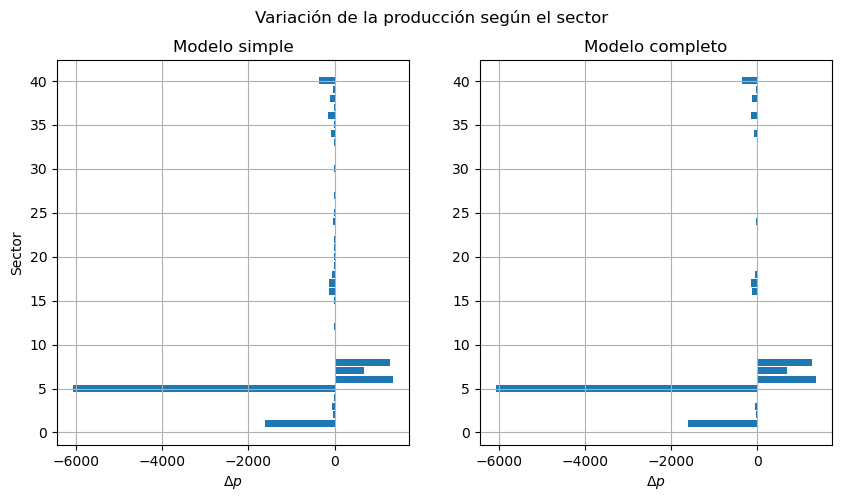

In [32]:
plt.figure(figsize=(6,6))

fig, axs = plt.subplots(1,2, figsize=(10,5))

axs[0].barh(np.linspace(1,40,40),delta_p_BRA_simple)
axs[0].grid()
axs[0].set_title("Modelo simple")
axs[0].set_xlabel(r"$\Delta p$")
axs[0].set_ylabel("Sector")

axs[1].barh(np.linspace(1,40,40),delta_p_BRA_completa)
axs[1].grid()
axs[1].set_title("Modelo completo")
axs[1].set_xlabel(r"$\Delta p$")

fig.suptitle("Variación de la producción según el sector")

In [33]:
P_BRA = P[0:40]
P_porcentajes_simple = ((P_BRA + delta_p_BRA_simple ) / P_BRA - 1) * 100
P_porcentajes_completa = ((P_BRA + delta_p_BRA_completa ) / P_BRA - 1) * 100

Text(0.5, 0.98, 'Variación de la producción según el sector')

<Figure size 600x600 with 0 Axes>

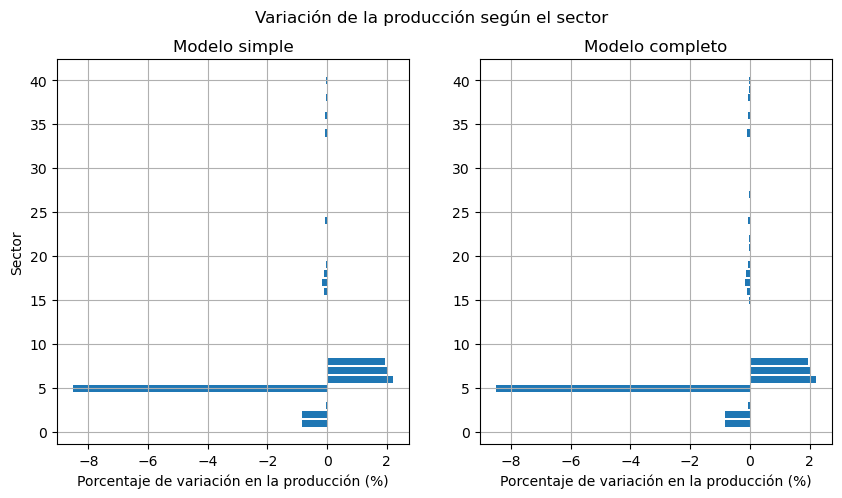

In [34]:
plt.figure(figsize=(6,6))

fig, axs = plt.subplots(1,2, figsize=(10,5))

axs[0].barh(np.linspace(1,40,40),P_porcentajes_simple)
axs[0].grid()
axs[0].set_title("Modelo simple")
axs[0].set_xlabel("Porcentaje de variación en la producción (%)")
axs[0].set_ylabel("Sector")

axs[1].barh(np.linspace(1,40,40),P_porcentajes_completa)
axs[1].grid()
axs[1].set_title("Modelo completo")
axs[1].set_xlabel("Porcentaje de variación en la producción (%)")

fig.suptitle("Variación de la producción según el sector")

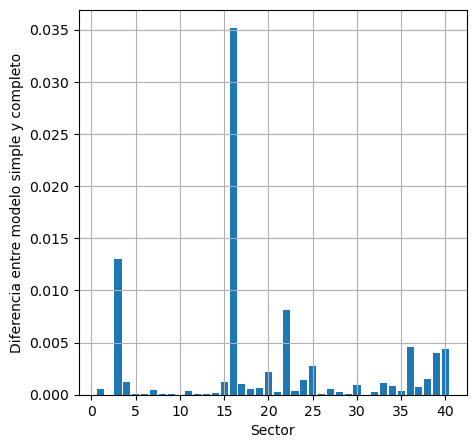

In [35]:
plt.figure(figsize=(5,5))
plt.bar(np.linspace(1,40,40),delta_p_BRA_simple - delta_p_BRA_completa)
plt.grid()
plt.xlabel("Sector")
plt.ylabel("Diferencia entre modelo simple y completo")
plt.show()

In [38]:
# vamos a comparar los outputs pre-shock y post-shock 

P_post = P_BRA + delta_p_BRA_simple
P_post

0     1.883872e+05
1     3.952936e+03
2     9.484226e+04
3     6.157420e+04
4     6.520509e+04
5     6.281680e+04
6     3.377725e+04
7     6.738547e+04
8     3.374327e+04
9     7.759851e+03
10    2.559871e+04
11    3.219306e+04
12    1.934043e+04
13    1.316921e+04
14    5.938544e+04
15    1.502241e+05
16    7.636953e+04
17    4.619109e+04
18    2.535883e+04
19    4.733887e+04
20    4.289948e+04
21    5.693577e+04
22    2.373973e+04
23    4.787335e+04
24    6.403438e+04
25    1.356105e+04
26    3.711947e+04
27    2.234719e+04
28    4.709820e+03
29    1.498401e+05
30    6.169361e+03
31    1.600432e+04
32    3.303990e+04
33    9.738263e+04
34    3.011469e+05
35    2.026291e+05
36    1.095438e+05
37    2.358958e+05
38    3.301104e+05
39    1.495140e+06
Name: Output, dtype: float64

Text(0.5, 0.98, 'Variación de la producción según el sector')

<Figure size 600x600 with 0 Axes>

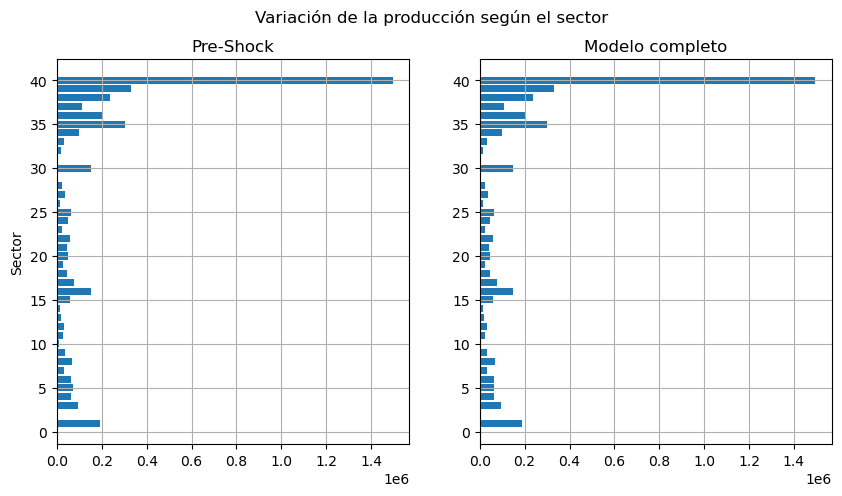

In [43]:
plt.figure(figsize=(6,6))

fig, axs = plt.subplots(1,2, figsize=(10,5))

axs[0].barh(np.linspace(1,40,40),P_BRA)
axs[0].grid()
axs[0].set_title("Preshock")
axs[0].set_ylabel("Sector")

axs[1].barh(np.linspace(1,40,40),P_post)
axs[1].grid()
axs[1].set_title("Postshock")
axs[1].set_xlabel("")
fig.suptitle("Produccion total")

#### Conclusiones

Como podemos ver en los gráficos, los sectores más afectados por el shock en la demanda externa, son los que reciben dicho shock. Luego el otro sector que se ve más afectado es el sector 1, que podríamos explicarlo diciendo que es el que tiene mayor relación con los sectores modificados.
 También vemos que la diferencia entre el modelo simple y el modelo completo es casi nula, sin embargo, existe una diferencia que se puede apreciar en el último gráfico.